# Regression

# Agenda
- Types of Regression
  * Linear Regression
    - Simple Linear Regression
      * Train- Test Split
    - Multiple Linear Regression
      * Overfitting and Underfitting
  * Non Linear Regression
    - Polynomial Regression
- Model Evaluation and Validation
  * Cross Validation Techniques
  * Performance Metrics for Regression
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
    - R- Squared (r2 score)
- Regularization Techniques
  * Lasso Regression
  * Ridge Regression
- Hyperparameter Tuning
  * GridSearchCV


# Types of Regression
Regression can be classified into two categories
Linear Regression - Find straight line relationship between the dependent variable and one or more independent variables
Non Linear Regression -  find relationship between the dependent variable and one or more independent variables using a curve or more complex shapes


## Linear Regression
it refers to a supervised learning algorithm used to predict a continuous target variable by modelling its relationship with one more independent variables using linear equation. It uses the least squares criterion to estmate the coefficient of regression equation. it is most useful where there is a linear relationship between feature and target. There are 2 type of linear Regression 
### Simple Linear Regression -  
Simple Linear Regression models the relation between **one** feature and the target as straightline. The Equation is
$$ \hat{y}_{i} =  \beta_{0} + \beta_{1}x $$

where:

- $\hat{y}$ -  Dependent Variable
- $x$ - Independent Variable
- $\beta_{0}$ - Intercept
- $\beta_{1}$ - Slope

### Multiple Linear Regression -
Multiple Linear Regression models the relation between **Two or more** features and the target as straightline. The Equation is
$$ \hat{y}_{i} =  \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + . . . + \beta_{p}x_{p} $$

or 

$$ \hat{y}_{i} =  \beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}$$


  

In [1]:
# Fit a linear regression model on a dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data
data = pd.read_csv('tvmarketing.csv')
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
# Seggregate the Feature and Target

X =  data.iloc[:,:-1]
y=  data.iloc[:, -1]

In [6]:
# Perform train test split

In [7]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [26]:
# Import the LinearRegression class from the scikit-learn linear_model module

from sklearn.linear_model import LinearRegression

In [27]:
# Create an instance of the LinearRegression
lin_reg =  LinearRegression()  # This Create a blank model


In [28]:
# Train the model created on training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
print(f'Coefficient of Regression is {lin_reg.coef_}')
print(f'Intercept  is {lin_reg.intercept_}')

Coefficient of Regression is [0.05009784]
Intercept  is 6.652274570554155


In [30]:
y_test_pred = lin_reg.predict(X_test)

In [31]:
# Visualize the linear Regression model

In [32]:
def viz_linear():
    plt.figure(figsize = (10,6))
    plt.scatter(X_test, y_test, color = 'green', alpha = 0.5)
    plt.scatter(X_train, y_train, color = 'magenta', s = 100)    
    plt.plot(X_test,y_test_pred, color = 'black', alpha = 0.5)
    plt.xlim([0,300])
    plt.ylim([0, 30])
    plt.yticks(np.arange(0,30))
    plt.title('Linear Regression Model (Test Set)')
    plt.xlabel('TV')
    plt.ylabel('Sales')          
    plt.show()

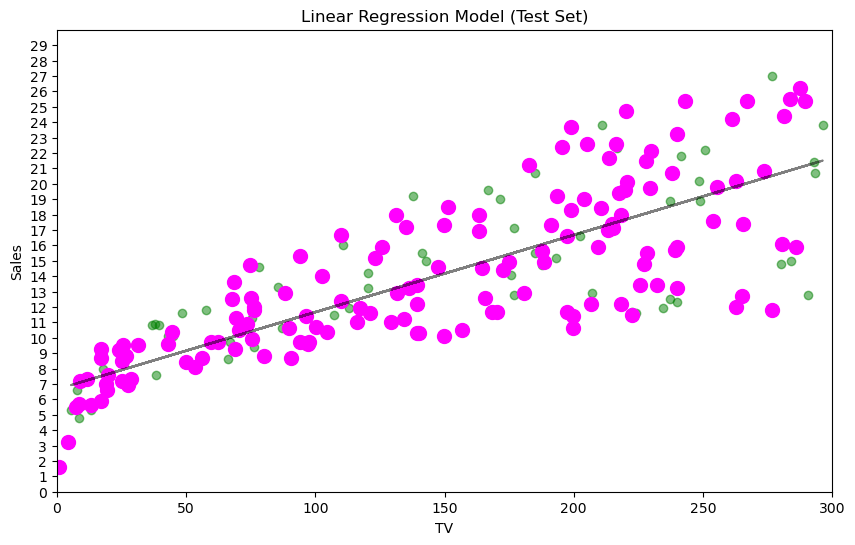

In [33]:
viz_linear()

In [34]:
# Predicting for single point unknown input (350)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
lin_reg.predict([[350]])

array([24.18651705])

# OverFitting and UnderFitting

when developing ML models, Achieving the right balance between the complexity and simplicity is crucial. This balance is covered by the concepts of overfitting and underfitting

## OverFitting
- Overfitting occurs when a model learns the noise and details in the training data too well to the extent that it negatively impacts its performance on new unseen data
- Sign: High Accuracy on Training Data but poor accuracy on testing data
- Cause: Model is too Complex. i.e. Model has too many parameters(dimensions/columns) to learn from and predict

## UnderFitting
- Underfitting occurs when a model is too simple to capture the underlying pattern of the data
- Sign: poor accuracy on both training and testing data
- Cause: Model is too Simple. i.e. Model has too less parameters(dimensions/columns) to learn from and predict

## Bias - Variance Tradeoff
- Bias -  Error due to overly simplistic assumptions in the learning algorithm. High Bias can cause underfitting
- Variance -  Error due to excessive complexity in the learning algorithm. High Variance can cause fitting

### Tradeoff
- Low Bias and High Variance -  Model fits the training data very well but fails to generalize (Overfit)
- High Bias and Low Variance - Model does not the fit that training data well and misses the underlying pattern (Underfit)
- Optimal Tradeoff :  Finding a Balance where the model performs well on both training and testing data, minimizing overall error.

In [37]:
# Lets understand how to check for overfittin or under fitting of the model

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred =  lin_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print All Metrics

print(f'Training Set MSE: {mse_train:.3f}')
print(f'Testing Set MSE: {mse_test:.3f}')
print(f'Training Set R2 Score: {r2_train:.3f}')
print(f'Testing Set R2 Score: {r2_test:.3f}')


Training Set MSE: 10.177
Testing Set MSE: 11.455
Training Set R2 Score: 0.633
Testing Set R2 Score: 0.553


In [40]:
if mse_train < mse_test or r2_train > r2_test:
    if abs(r2_train- r2_test)> 0.1:
        print("The model may be overfitting to the training Data")
    else:
        print("The model performs reasonably well but check for slight overfitting")
elif mse_train > mse_test and r2_train < r2_test :
    print("Model may underfitting, consider increasing model complexity")
else:
    print('Model has balanced fit on both training and testing datasets')

The model performs reasonably well but check for slight overfitting


# PolyNomial Regression

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
poly_feat =  PolynomialFeatures(degree = 8)
X_train_poly =  poly_feat.fit_transform(X_train)
X_test_poly =  poly_feat.transform(X_test)

In [119]:
X_train.head()

,TV
99,135.2
73,129.4
163,163.5
147,243.2
127,80.2


In [120]:
poly_reg =  LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [121]:
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly =  poly_reg.predict(X_test_poly)

In [122]:
def viz_linear():
    plt.figure(figsize = (10,6))
    plt.scatter(X_test, y_test, color = 'green', alpha = 0.5)
    plt.scatter(X_train, y_train, color = 'magenta', s = 100)    
    plt.scatter(X_test,y_test_pred_poly, color = 'black')
    plt.xlim([0,300])
    plt.ylim([0, 30])
    plt.yticks(np.arange(0,30))
    plt.title('Polynomial -  Regression Model (Test Set)')
    plt.xlabel('TV')
    plt.ylabel('Sales')          
    plt.show()

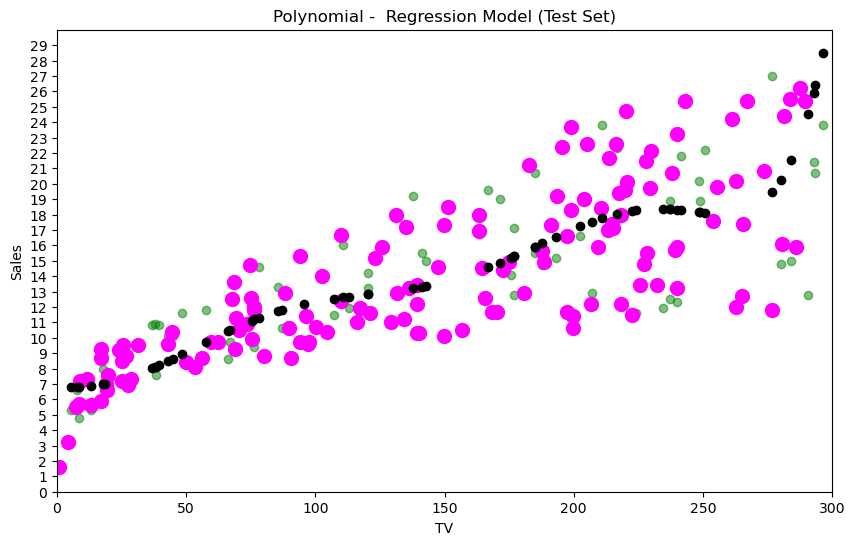

In [123]:
viz_linear()

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
X = np.arange(1,10)
y = -2*X ** 3 - 4*X**2 + X - 10

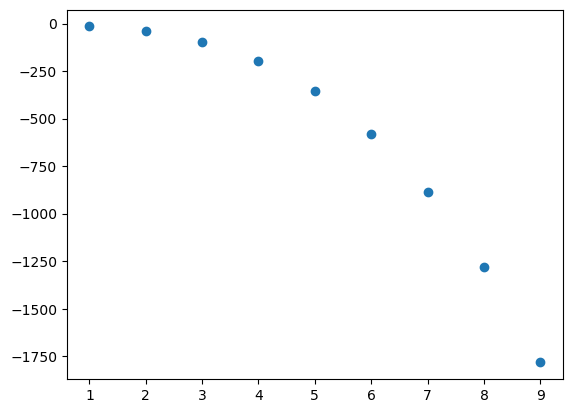

In [64]:
plt.scatter(X, y)
plt.show()

In [65]:
import pandas as pd

In [66]:
df  = pd.DataFrame(X, columns = ['X'])
df['y'] = y
df

,X,y
0,1,-15
1,2,-40
2,3,-97
3,4,-198
4,5,-355
5,6,-580
6,7,-885
7,8,-1282
8,9,-1783


In [67]:
from sklearn.linear_model import LinearRegression

In [76]:
lr =  LinearRegression()
lr.fit(pd.DataFrame(df['X']),y)
yhat = lr.predict(pd.DataFrame(df['X']))

In [77]:
df['yhat'] = yhat

In [78]:
df

,X,y,yhat
0,1,-15,268.733333
1,2,-40,56.133333
2,3,-97,-156.466667
3,4,-198,-369.066667
4,5,-355,-581.666667
5,6,-580,-794.266667
6,7,-885,-1006.866667
7,8,-1282,-1219.466667
8,9,-1783,-1432.066667


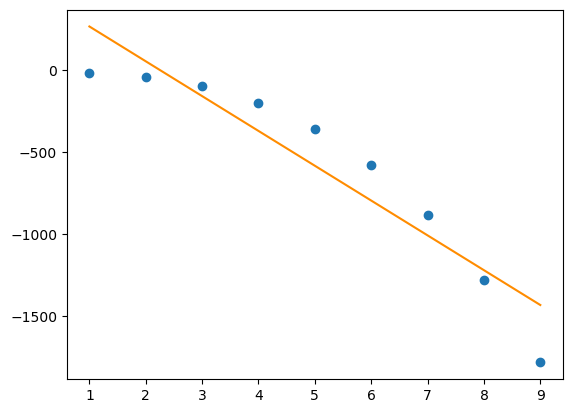

In [81]:
plt.scatter(X, y)
plt.plot(X, yhat, color = 'darkorange')
plt.show()

In [82]:
lr.predict([[10]])

array([-1644.66666667])

In [83]:
df['X3'] = X**3
df['X2'] = X**2

df['X0'] = X**3

In [87]:
df = df.drop(columns = ['X0'])

In [89]:
df['X0'] = X**0

In [90]:
df.columns

Index(['X', 'y', 'yhat', 'X3', 'X2', 'X0'], dtype='object')

In [91]:
df = df[['X3', 'X2', 'X', 'X0', 'y', 'yhat']]

In [92]:
df

,X3,X2,X,X0,y,yhat
0,1,1,1,1,-15,268.733333
1,8,4,2,1,-40,56.133333
2,27,9,3,1,-97,-156.466667
3,64,16,4,1,-198,-369.066667
4,125,25,5,1,-355,-581.666667
5,216,36,6,1,-580,-794.266667
6,343,49,7,1,-885,-1006.866667
7,512,64,8,1,-1282,-1219.466667
8,729,81,9,1,-1783,-1432.066667


In [93]:
inp = df.drop(columns = ['y', 'yhat'])
out = df['y']

In [94]:
lr_poly = LinearRegression()
lr_poly.fit(inp, out)
yhat_poly = lr_poly.predict(inp)
df['yhat_poly'] = yhat_poly

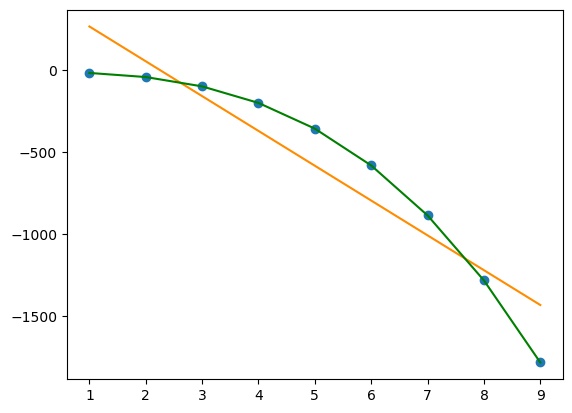

In [95]:
plt.scatter(X, y)
plt.plot(X, yhat, color = 'darkorange')
plt.plot(X, yhat_poly, color = 'green')
plt.show()

In [96]:
print(lr_poly.coef_)
print(lr_poly.intercept_)

[-2. -4.  1.  0.]
-9.99999999999909


In [98]:
lr_poly.predict([[1000,100,10,1]])

array([-2400.])

In [125]:
inp.corr()

,X3,X2,X,X0
X3,1.000000,0.987365,0.929899,NaN
X2,0.987365,1.000000,0.975281,NaN
X,0.929899,0.975281,1.000000,NaN
X0,NaN,NaN,NaN,NaN


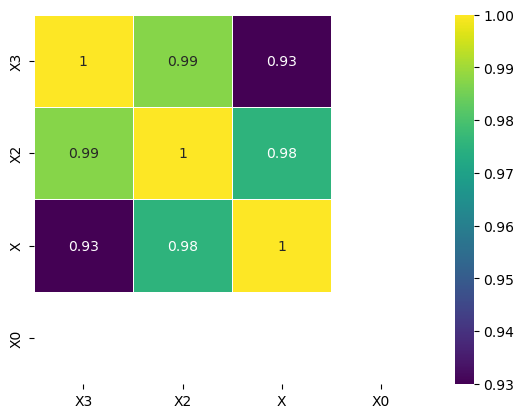

In [124]:
import seaborn as sns
sns.heatmap(inp.corr(), annot = True, cmap ='viridis', linewidths = 0.5)
plt.show()

In [129]:
mat =  np.random.randint(1,100, size = (4,4))
np.corrcoef(mat)

array([[ 1.        , -0.80513706,  0.99500002, -0.67865705],
       [-0.80513706,  1.        , -0.74596685,  0.96785957],
       [ 0.99500002, -0.74596685,  1.        , -0.60242214],
       [-0.67865705,  0.96785957, -0.60242214,  1.        ]])

<Axes: >

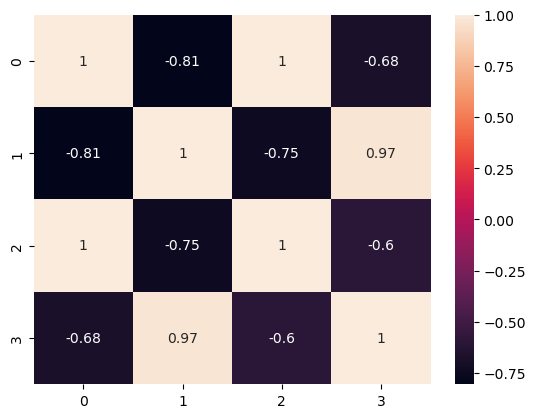

In [132]:
sns.heatmap(np.corrcoef(mat), annot = True)

# Model Evaluation and Validation
## Performance Metrics
- Evaluation metrics helps in regression analysis as they provide the quantitative measure of model performance, whild helps in the assesment and selection of regression models. We have several evaluation metrics for regression most commonly used are
- **Mean Squared Error (MSE)** - It calculates the average of the squared errors(The difference between actual and predicted values). A lower MSE indicates a better model performance. it is represented Mathematically as
$$\text{MSE} =  \frac{\sum_{i=1}^{n}{(y_{i} - \hat{y_{i}})}^2}{n}$$

where:

$y_{i}$ - is the actual value for $i^{th}$ row <br>
$\hat{y_{i}}$ - is the predicted value for $i^{th}$ row represent by :
$$\hat{y_{i}} = \beta_{0} + \sum_{j=1}^{p}\beta_{j} . x_{j}$$

here:
$p$ - represent the number of features

Further MSE can be represented as :

$$\text{MSE} =  \frac{\sum_{i=1}^{n}{(y_{i} - (\beta_{0} + \sum_{j=1}^{p}\beta_{j} . x_{j}))}^2}{n}$$

- **Mean Absolute Error (MAE)** - It calculates the average of the absolute errors(The difference between actual and predicted values). It is less sensitive to outliers comapred to MSE. it is represented Mathematically as
$$\text{MAE} =  \frac{\sum_{i=1}^{n}|(y_{i} - \hat{y_{i}})|}{n}$$

where:

$y_{i}$ - is the actual value for $i^{th}$ row<br>
$\hat{y_{i}}$ - is the predicted value for $i^{th}$ row represent by :
$$\hat{y_{i}} = \beta_{0} + \sum_{j=1}^{p}\beta_{j} . x_{j}$$

here:
$p$ - represent the number of features

Further MAE can be represented as :

$$\text{MAE} =  \frac{\sum_{i=1}^{n}|(y_{i} - (\beta_{0} + \sum_{j=1}^{p}\beta_{j} . x_{j}))|}{n}$$

- **Root Mean Squared Error (MSE)** - RMSE is the square root of MSE, providing a measure of average magnitude of errors in the predicted values.Since Square Root reverses the square operation of MSE, RMSE ends up having the same unit as the orginal target variable, which makes it easier to interpret. it is represented Mathematically as
$$\text{RMSE} =  \sqrt{\frac{\sum_{i=1}^{n}{(y_{i} - \hat{y_{i}})}^2}{n}}$$

where:

$y_{i}$ - is the actual value for $i^{th}$ row <br>
$\hat{y_{i}}$ - is the predicted value for $i^{th}$ row represent by :
$$\hat{y_{i}} = \beta_{0} + \sum_{j=1}^{p}\beta_{j} . x_{j}$$

here:
$p$ - represent the number of features

Further RMSE can be represented as :

$$\text{RMSE} =  \sqrt{\frac{\sum_{i=1}^{n}{(y_{i} - (\beta_{0} + \sum_{j=1}^{p}\beta_{j} . x_{j}))}^2}{n}}$$


- **R-Squared (R2)** - R- Squared explains how much of the variation in the dependent variable (y) can be attributed to the changes in the independent variable (x). R- Squared values usually ranges between 0 and 1
  
  - **0** -  This indicates that the model explains none of the variance in the dependent variable. The independent variable (x) have no explanatory powers for the changes in y
  - **1** -  This represents perfect fit. The model explains all the variance in the dependent variable. The changes is (y) are perfectly captured by changes is (x). it is represented Mathematically as
  - 
$$\text{R- Squared} = 1 -  \frac{\text{RSS}}{\text{TSS}}$$

where:


$\text{RSS} =\sum_{i=1}^{n} {(y_{i} - (\beta_{0} + \sum_{j=1}^{p}\beta_{j} . x_{j}))}^2$ <br>
$\text{TSS} = \sum_{i=1}^{n}{(y_{i} - \overline{y})}^2$<br>

$y_{i}$ - is the actual value for $i^{th}$ row <br>
$\overline{y}$ - is the mean value for depenedent variable (y)<br>

$p$ - represent the number of features


## Cross Validation Techniques
Cross Validation is a machine learning that evaluates the model performance on unseen data by dividing the data into multiple folds. In each Iteration one fold is used as validation set and the remaining as training set. This process is repeated such that each fold serves as the validation set once. The results from all iterations are averaged to provide a robust estimate of model performance. common cross validation techniques are
- **K-Fold Cross Validation**
  In K Fold Cross validation, the dataset is divided into *k* equal sized folds. The model is trained on *k-1* folds  and tested on the remaining fold. This process is repeated *k* times, with each fold used exactly once as the test set. The results are averaged to produce a single performance estimate.<br>
  - Pros: provides a more accurate estimate of the model performance
  - Cons: Computationally intensive (Specially for large datasets)
- **Stratified K-Fold Cross Validation**
  Similar to K-Fold but ensures that each fold has same proportion of the different classes as the orginal dataset. This is specially useful in classification problems<br>

In [133]:
# Lets now build a linear regression model, perform analysis and evaluate performance

In [134]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [135]:
df =  pd.read_csv('housing_with_ocean_proximity.csv')

In [136]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [137]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [139]:
# Missing values Check 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [140]:
df['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [142]:
# Dropping Missing values

In [143]:
df = df.dropna()

In [144]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

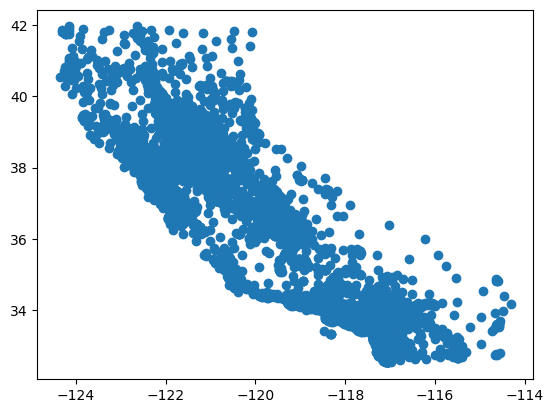

In [150]:
plt.scatter(df['longitude'], df['latitude'])
plt.show()

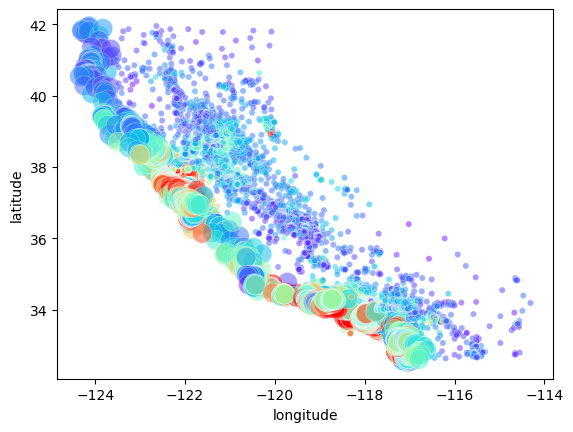

In [159]:
sns.scatterplot(x= 'longitude', y='latitude', hue = 'median_house_value', 
                size = 'ocean_proximity', sizes = [20, 200], data = df, legend= False, palette = 'rainbow', alpha = 0.5)
plt.show()

In [161]:
df = pd.get_dummies(df, drop_first= True, dtype = 'int', prefix = 'op')

In [162]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [163]:
# Extract Feature and Target and pefrom Train test Split

In [188]:
X =  df.drop(columns = ['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3,random_state =0 )

In [189]:
# Perform K Fold validtion

kfold = KFold(n_splits = 10, shuffle = True,random_state = 25)
model = LinearRegression()

k_fold_scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = kfold, n_jobs = -1)

In [190]:
print(f"Cross Validation Results for each fold  {k_fold_scores}")
print()
print(f"Mean R2 Score for Cross Validation is  {k_fold_scores.mean():.3f}")

Cross Validation Results for each fold  [0.63605268 0.66736358 0.65010875 0.64797133 0.64003324 0.64309188
 0.63510672 0.60869181 0.63580452 0.66537692]

Mean R2 Score for Cross Validation is  0.643


In [191]:
# Evaulate the model on test set

model.fit(X_train, y_train)
y_test_pred =  model.predict(X_test)
test_mse =  mean_squared_error(y_test, y_test_pred)
test_mae =  mean_absolute_error(y_test, y_test_pred)
test_r2 =  r2_score(y_test, y_test_pred)

In [192]:
print(f'MSE Test Data - {test_mse:.3f}')
print(f'RMSE Test Data - {np.sqrt(test_mse):.3f}')
print(f'MAE Test Data - {test_mae:.3f}')
print(f'R2 Test Data - {test_r2:.3f}')

MSE Test Data - 4699359207.200
RMSE Test Data - 68551.872
MAE Test Data - 49884.016
R2 Test Data - 0.650


In [ ]:
k